# Classification on Wine Quality Data Set(Random Forest Classification & Gaussian Naive Bayes Models)

<img src="Wine quality.png" width="250"/>

Two datasets are included, related to red and white vinho verde wine samples, from the north of Portugal. The goal is to model wine quality based on physicochemical tests

# Set up

In [1]:
# Numerical arrays.
import numpy as np

# Data frames.
import pandas as pd

# Plotting.
import matplotlib.pyplot as plt

# Logistic regression.
import sklearn.linear_model as lm

# K nearest neaighbours.
import sklearn.neighbors as nei

# Helper functions.
import sklearn.model_selection as mod

# Fancier, statistical plots.
import seaborn as sns


In [2]:
# Standard plot size.
plt.rcParams['figure.figsize'] = (15, 10)

# Standard colour scheme.
plt.style.use('ggplot')

# Data

In [3]:
# Have a look at the data.
df1= pd.read_csv('data/winequality-red.csv', sep=";")
df1["isRed"] = 1  

In [4]:
df1

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,isRed
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,1
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,1
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,1
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,1
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,1
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,1
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,1
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5,1


In [5]:
# Summary statistics.
df1.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,isRed
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.0
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023,1.0
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569,0.0
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000,1.0
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000,1.0
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000,1.0
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000,1.0
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000,1.0


In [6]:
# Have a look at the data.
df2 = pd.read_csv('data/winequality-white.csv', sep=";")
df2["isRed"] = 0

In [7]:
df2

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,isRed
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6,0
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6,0
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6,0
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6,0
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,0
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,0
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,0
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,0


In [8]:
df=pd.concat([df1, df2])

In [9]:
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,isRed
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,0
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,0
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,0
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,0


# Graphs

<AxesSubplot:xlabel='alcohol', ylabel='quality'>

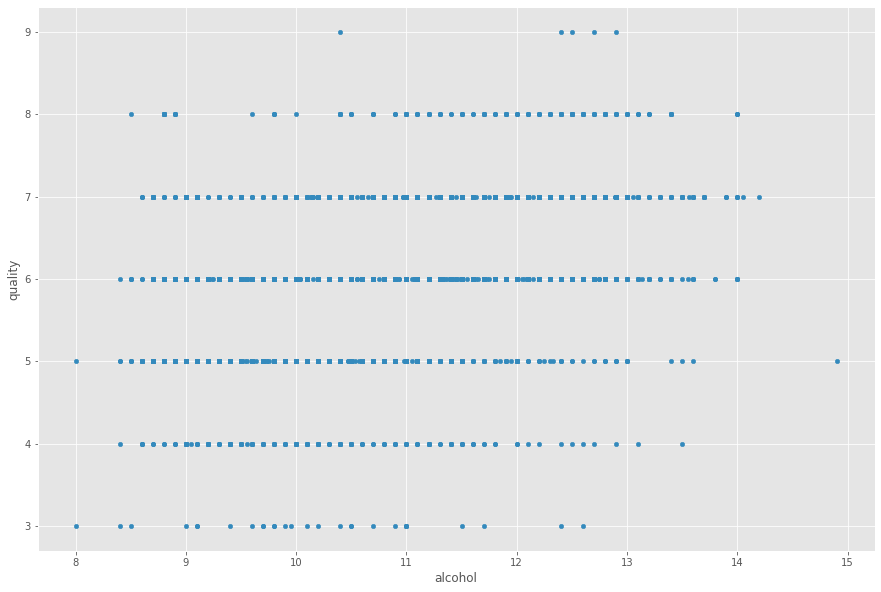

In [10]:
# Plot quality against alcohol quantity
df.plot.scatter(x = 'alcohol', y = 'quality')

Text(0, 0.5, 'alcohol')

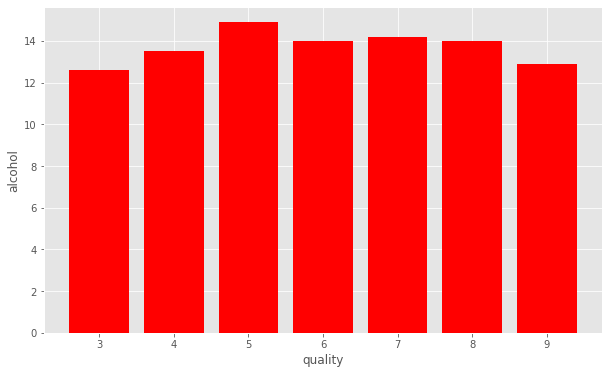

In [11]:
plt.figure(figsize=[10,6])
# plot bar graph
plt.bar(df['quality'],df['alcohol'],color='red')
# label x-axis
plt.xlabel('quality')
#label y-axis
plt.ylabel('alcohol')

C:\Users\Wasthu\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


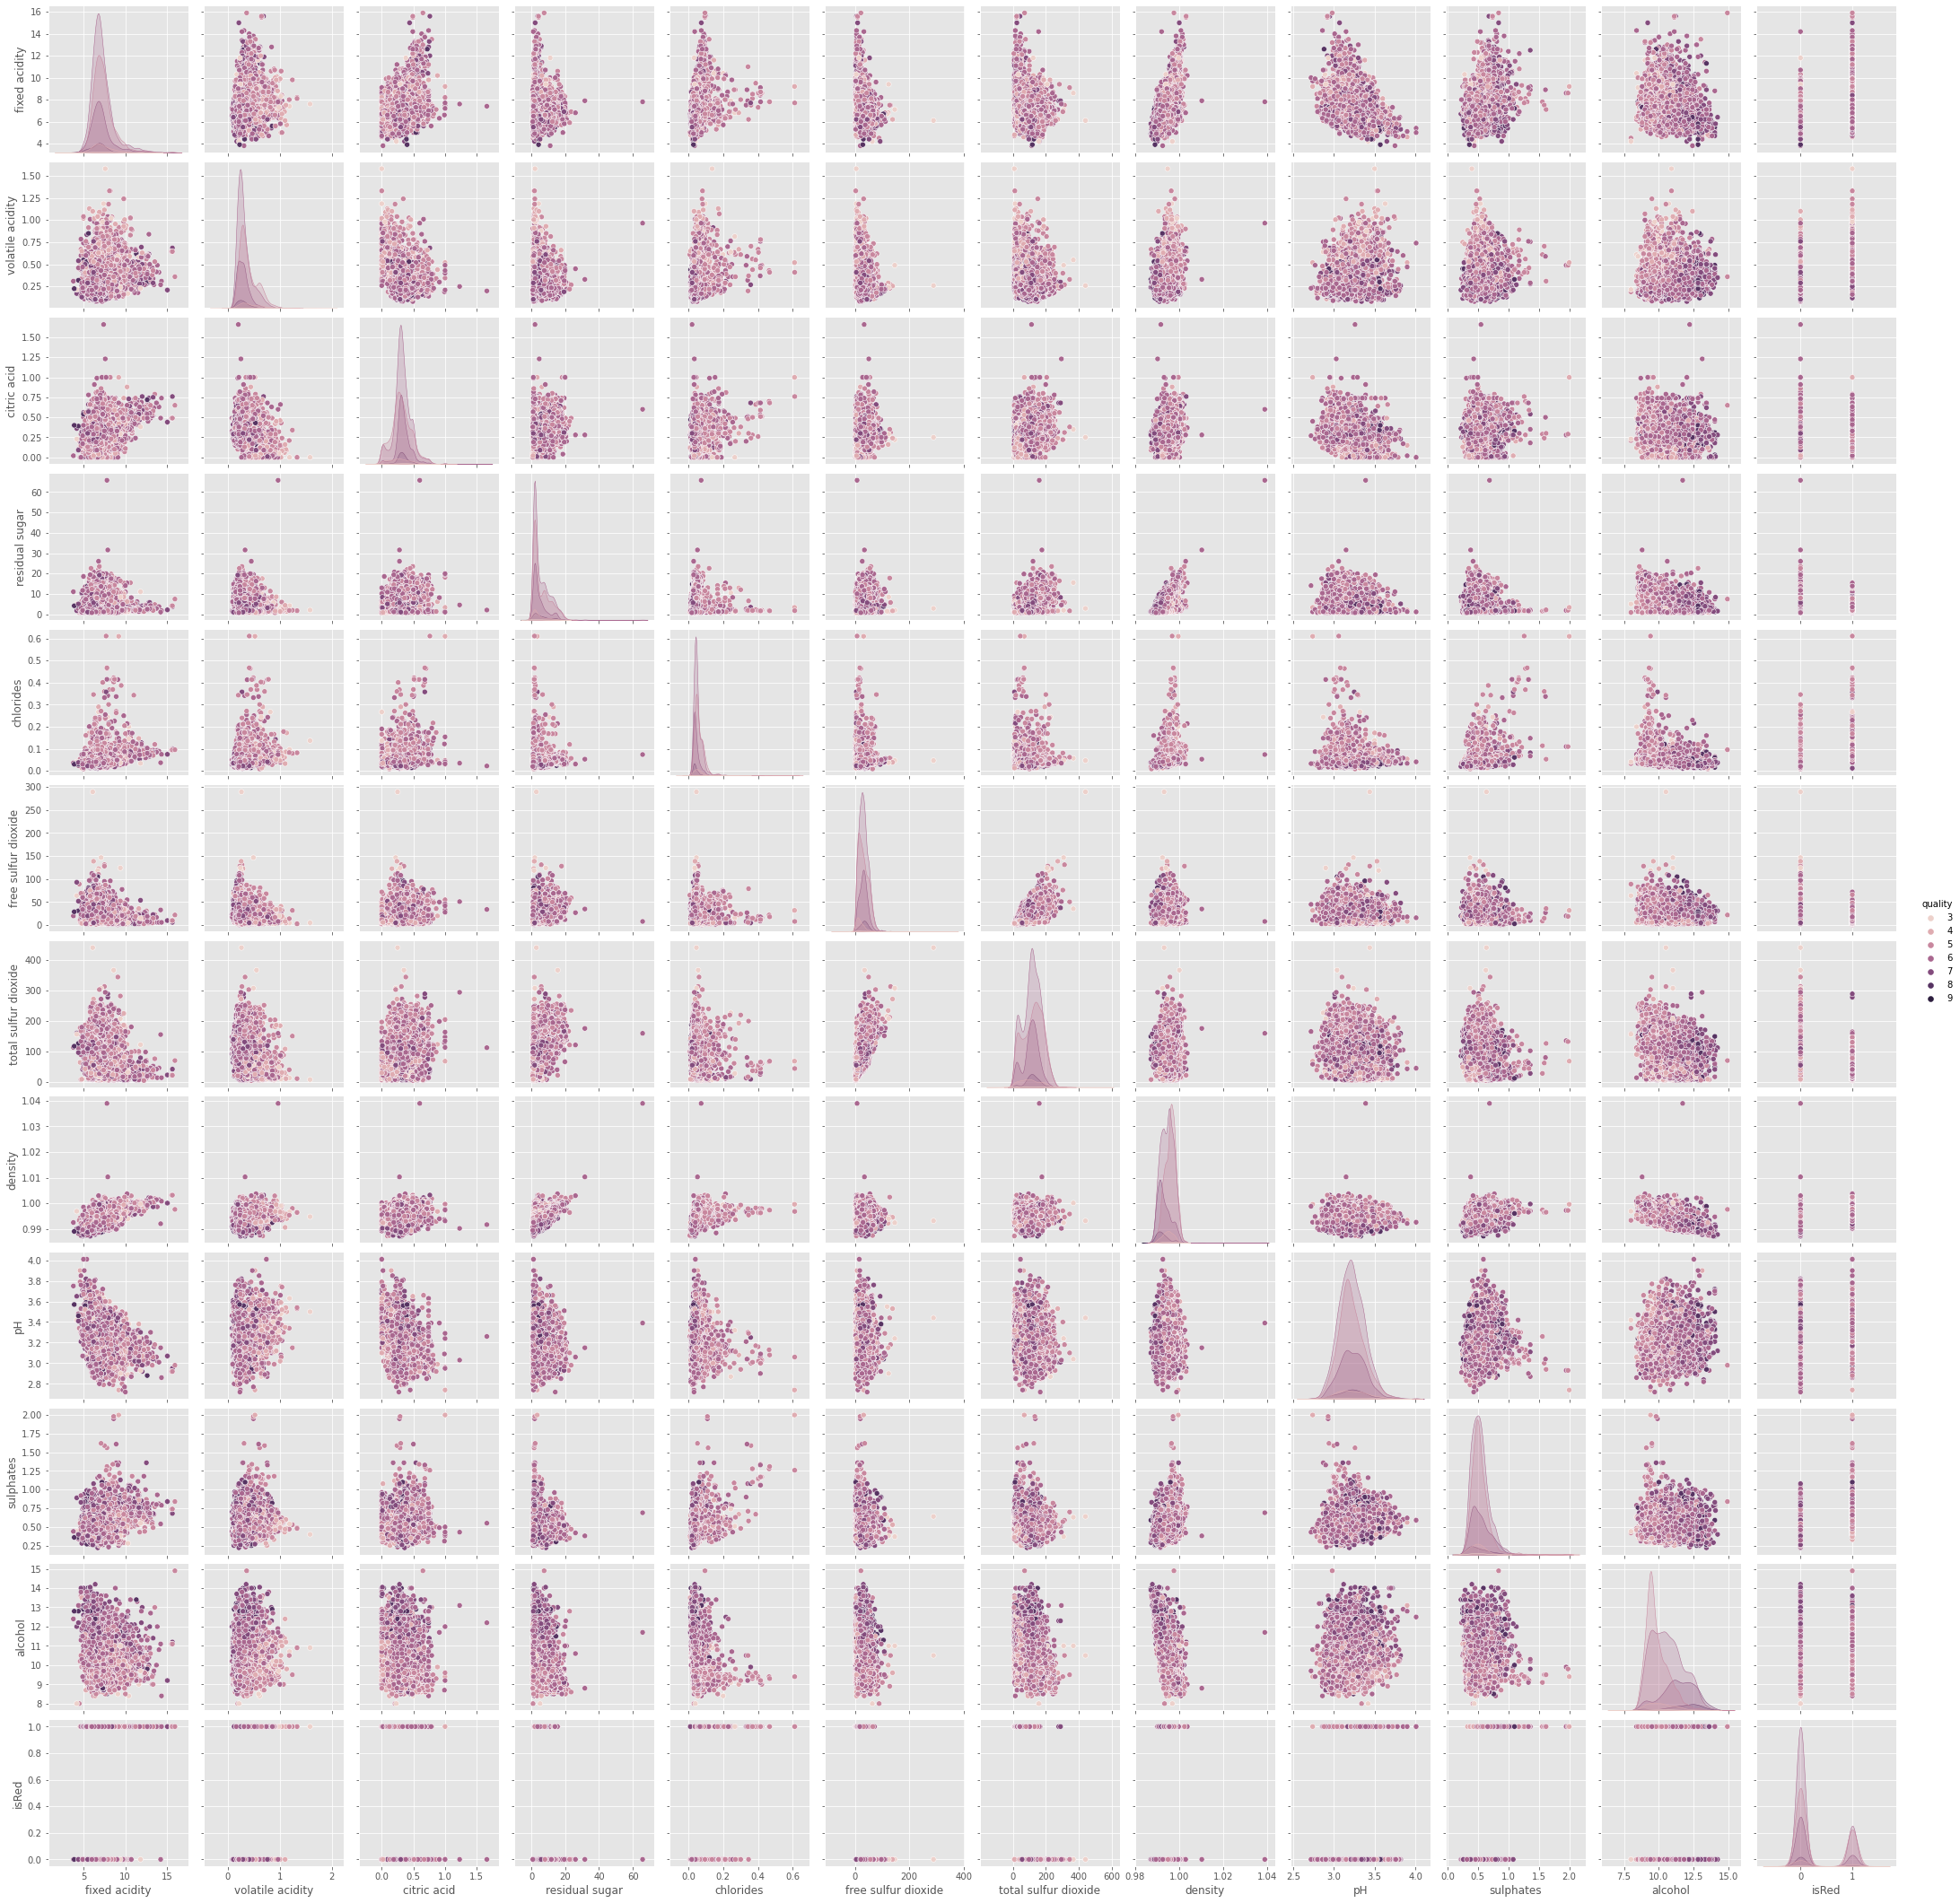

In [12]:
# Scatter plots and kdes.
sns.pairplot(df, hue='quality');

In [13]:
# How the segregation works.
df['quality'] == 5

0        True
1        True
2        True
3       False
4        True
        ...  
4893    False
4894     True
4895    False
4896    False
4897    False
Name: quality, Length: 6497, dtype: bool

In [14]:
df[df['quality'] == 5].head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,isRed
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5,1


# Using groupby()

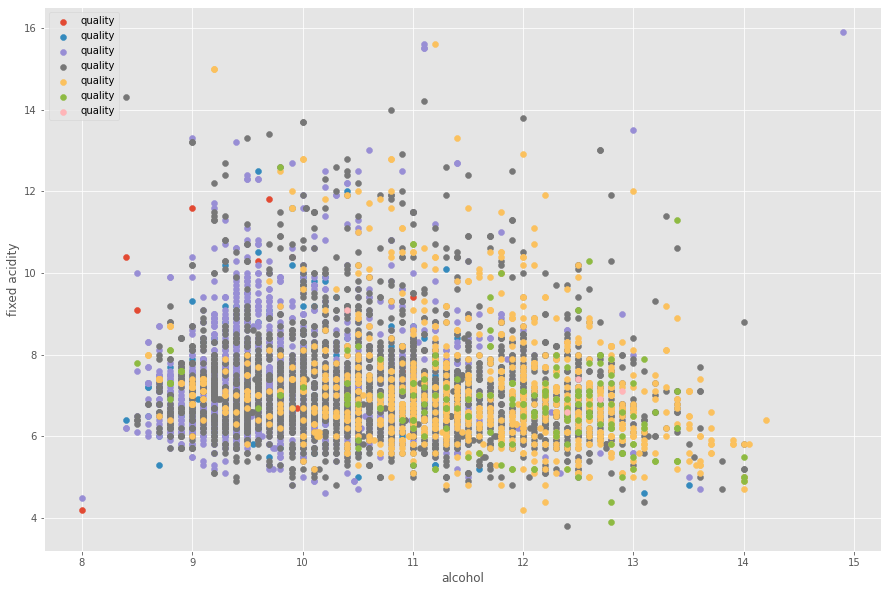

In [15]:
# New plot.
fig, ax = plt.subplots()

# Using pandas groupby().
for species, data in df.groupby('quality'):
    ax.scatter(data['alcohol'], data['fixed acidity'], label='quality')

# Show the legend.
ax.set_xlabel('alcohol')
ax.set_ylabel('fixed acidity')
ax.legend();

In [16]:
# Group by typically takes a categorical variable.
x = df.groupby('quality')
x

In [17]:
# Pivot tables.
x.mean()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,isRed
quality,,,,,,,,,,,,
3,7.853333,0.517000,0.281000,5.140000,0.077033,39.216667,122.033333,0.995744,3.257667,0.506333,10.215000,0.333333
4,7.288889,0.457963,0.272315,4.153704,0.060056,20.636574,103.432870,0.994833,3.231620,0.505648,10.180093,0.245370
5,7.326801,0.389614,0.307722,5.804116,0.064666,30.237371,120.839102,0.995849,3.212189,0.526403,9.837783,0.318522
6,7.177257,0.313863,0.323583,5.549753,0.054157,31.165021,115.410790,0.994558,3.217726,0.532549,10.587553,0.224965
7,7.128962,0.288800,0.334764,4.731696,0.045272,30.422150,108.498610,0.993126,3.228072,0.547025,11.386006,0.184430
8,6.835233,0.291010,0.332539,5.382902,0.041124,34.533679,117.518135,0.992514,3.223212,0.512487,11.678756,0.093264
9,7.420000,0.298000,0.386000,4.120000,0.027400,33.400000,116.000000,0.991460,3.308000,0.466000,12.180000,0.000000


In [18]:
# Looping through groupby().
for i, j in x:
    print()
    print(f"i is: '{i}'")
    print(f"j looks like:\n{j[:3]}")
    print()


i is: '3'
j looks like:
     fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
459           11.6             0.580         0.66            2.20      0.074   
517           10.4             0.610         0.49            2.10      0.200   
690            7.4             1.185         0.00            4.25      0.097   

     free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
459                 10.0                  47.0   1.0008  3.25       0.57   
517                  5.0                  16.0   0.9994  3.16       0.63   
690                  5.0                  14.0   0.9966  3.63       0.54   

     alcohol  quality  isRed  
459      9.0        3      1  
517      8.4        3      1  
690     10.7        3      1  


i is: '4'
j looks like:
    fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
18            7.4              0.59         0.08             4.4      0.086   
38            5.7              1.13      

### Relationship between the features

<AxesSubplot:>

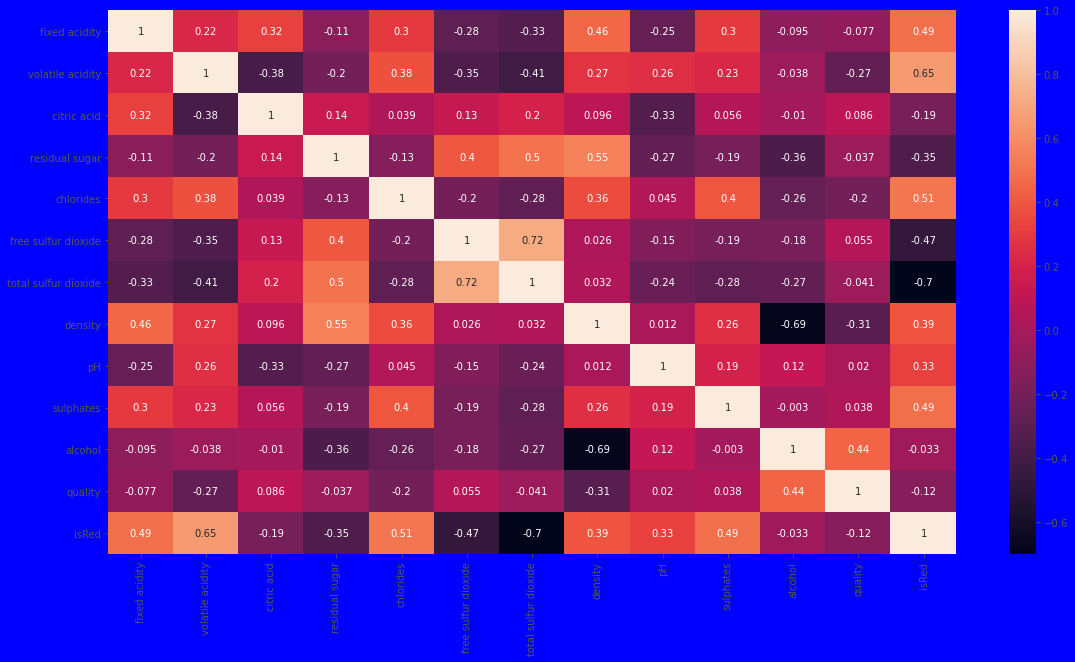

In [19]:
# ploting heatmap
plt.figure(figsize=[19,10],facecolor='blue')
sns.heatmap(df.corr(),annot=True)

### highly related columns

In [20]:
for a in range(len(df.corr().columns)):
    for b in range(a):
        if abs(df.corr().iloc[a,b]) >0.7:
            column = df.corr().columns[a]
            print(column)

total sulfur dioxide
isRed


### Preparing Train & Test Data Sets

In [21]:
# Checking for null values
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
isRed                   0
dtype: int64

In [22]:
#Fill those null values
df.update(df.fillna(df.mean()))

In [23]:
# for catogerical values 
df = pd.get_dummies(df,drop_first=True)
# display new dataframe
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,isRed
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,0
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,0
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,0
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,0


In [24]:
#if quality>= 7 considering it has good quality
df["best quality"] = [ 1 if x>=7 else 0 for x in df.quality] 
print(df)

      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4              0.70         0.00             1.9      0.076   
1               7.8              0.88         0.00             2.6      0.098   
2               7.8              0.76         0.04             2.3      0.092   
3              11.2              0.28         0.56             1.9      0.075   
4               7.4              0.70         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
4893            6.2              0.21         0.29             1.6      0.039   
4894            6.6              0.32         0.36             8.0      0.047   
4895            6.5              0.24         0.19             1.2      0.041   
4896            5.5              0.29         0.30             1.1      0.022   
4897            6.0              0.21         0.38             0.8      0.020   

      free sulfur dioxide  

In [25]:
# See proportion of good vs bad wines
df['best quality'].value_counts()

0    5220
1    1277
Name: best quality, dtype: int64

In [26]:
# Separate feature variables and target variable
x = df.drop(['quality','best quality', 'isRed'], axis = 1)
y = df['best quality']
x,y

(      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
 0               7.4              0.70         0.00             1.9      0.076   
 1               7.8              0.88         0.00             2.6      0.098   
 2               7.8              0.76         0.04             2.3      0.092   
 3              11.2              0.28         0.56             1.9      0.075   
 4               7.4              0.70         0.00             1.9      0.076   
 ...             ...               ...          ...             ...        ...   
 4893            6.2              0.21         0.29             1.6      0.039   
 4894            6.6              0.32         0.36             8.0      0.047   
 4895            6.5              0.24         0.19             1.2      0.041   
 4896            5.5              0.29         0.30             1.1      0.022   
 4897            6.0              0.21         0.38             0.8      0.020   
 
       free su

In [27]:
# standarize the data set(mean=0, standard deviation=1)
from sklearn.preprocessing import StandardScaler
X = StandardScaler().fit_transform(x)

In [28]:
#Split the data set for cross validation
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=40)

## Random Forest Classification

In [29]:
# importing RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

from sklearn.ensemble import RandomForestClassifier
model1 = RandomForestClassifier(random_state=1)
model1.fit(x_train, y_train)
y_pred1 = model1.predict(x_test)
rnd_score =model1.score(x_test,y_test)
print('score of model is : ',rnd_score)
                         
print(classification_report(y_test,y_pred1))

score of model is :  0.8884615384615384
              precision    recall  f1-score   support

           0       0.90      0.97      0.93      1030
           1       0.82      0.60      0.69       270

    accuracy                           0.89      1300
   macro avg       0.86      0.78      0.81      1300
weighted avg       0.88      0.89      0.88      1300



In [30]:
#Differenciate Actual value and predicted value

predicted_df = {'predicted_values': y_pred1, 'original_values': y_test}
#creating new dataframe
pd.DataFrame(predicted_df).head(20)

,predicted_values,original_values
369,1,1
4644,1,0
1775,0,0
1009,0,0
220,0,0
2420,1,1
871,0,0
2111,0,0
2182,0,0
1248,0,0


In [31]:
#Save model
import pickle
file = 'wine_quality'
#save file
save = pickle.dump(model1,open(file,'wb'))

## Gaussian Naive Bayes

In [32]:
# Set up
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB

In [33]:
#model
model2 = GaussianNB()
model2.fit(x_train, y_train)
y_pred2 = model2.predict(x_test)
rnd_score2 =model2.score(x_test,y_test)
print('score of model is : ',rnd_score2)

score of model is :  0.7446153846153846


In [34]:
print(classification_report(y_test,y_pred2))

              precision    recall  f1-score   support

           0       0.89      0.77      0.83      1030
           1       0.43      0.65      0.51       270

    accuracy                           0.74      1300
   macro avg       0.66      0.71      0.67      1300
weighted avg       0.80      0.74      0.76      1300



# Feature Importance

## Random Forest Classifier

<AxesSubplot:>

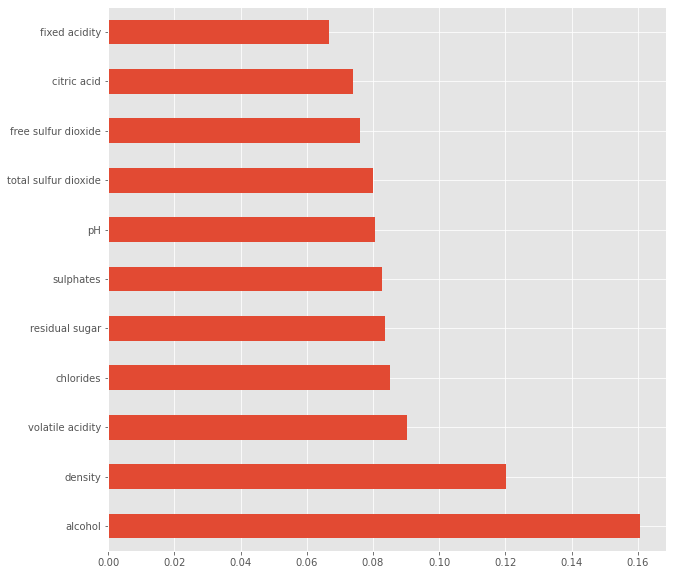

In [35]:
feat_importances = pd.Series(model1.feature_importances_, index=x.columns)
feat_importances.nlargest(25).plot(kind='barh',figsize=(10,10))